In [28]:
import open3d as o3d
import numpy as np
import sys
sys.path.append('./data/')
from camera import *
import matplotlib.pyplot as plt

In [34]:
def visualize_map(map):
    plt.imshow(map)
    plt.show()

In [20]:
T_init = np.eye(4)
camera = Camera()

depth_path = "./data/rgbd_dataset_freiburg1_xyz/depth/1305031102.160407.png"
depth_numpy = load_depth_as_numpy(depth_path)
point_cloud_numpy = camera.point_cloud_from_depth(depth_numpy)

Depth map shape: (480, 640)
Point cloud shape: (307200, 3)


In [21]:
print(point_cloud_numpy.shape)
point_cloud_o3d = o3d.geometry.PointCloud()
point_cloud_o3d.points = o3d.utility.Vector3dVector(point_cloud_numpy)
print(point_cloud_o3d)

(307200, 3)
PointCloud with 307200 points.


In [22]:
print(point_cloud_o3d.has_normals())
print(point_cloud_o3d.has_points())
print(point_cloud_o3d.normals)
print(point_cloud_o3d.points)

False
True
std::vector<Eigen::Vector3d> with 0 elements.
Use numpy.asarray() to access data.
std::vector<Eigen::Vector3d> with 307200 elements.
Use numpy.asarray() to access data.


In [23]:
point_cloud_o3d.estimate_normals()

In [26]:
point_cloud_o3d.normalize_normals()

PointCloud with 307200 points.

In [27]:
print(point_cloud_o3d.has_normals())
print(point_cloud_o3d.has_points())
print(np.asarray(point_cloud_o3d.normals))
print(point_cloud_o3d.points)

True
True
[[-8.32112083e-06  6.00342109e-06  1.00000000e+00]
 [-7.10403999e-06  5.40746246e-06  1.00000000e+00]
 [-6.08893301e-06  4.59465440e-06  1.00000000e+00]
 ...
 [ 6.08892436e-06 -4.59465579e-06  1.00000000e+00]
 [ 7.10403999e-06 -5.40746246e-06  1.00000000e+00]
 [ 8.32112083e-06 -6.00342109e-06  1.00000000e+00]]
std::vector<Eigen::Vector3d> with 307200 elements.
Use numpy.asarray() to access data.


In [32]:
normals = np.asarray(point_cloud_o3d.normals)
normals = normals.reshape((480, 640, 3))

points = np.asarray(point_cloud_o3d.points)
points = points.reshape((480, 640, 3))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


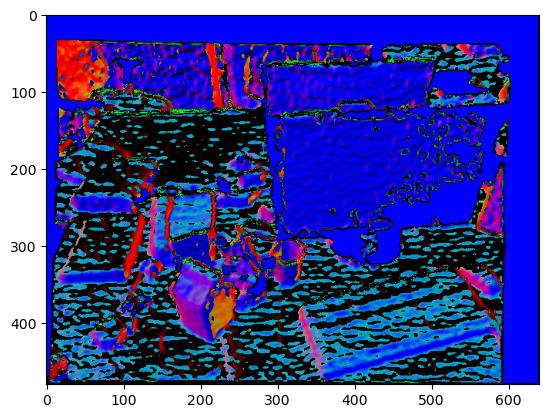

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


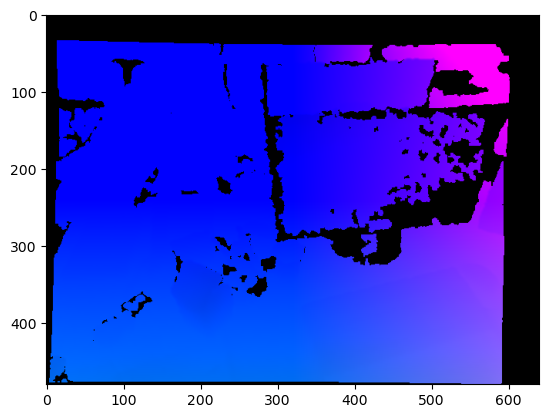

In [35]:
visualize_map(normals)
visualize_map(points)